<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Titanic---Supervised-Classification" data-toc-modified-id="Titanic---Supervised-Classification-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Titanic - Supervised Classification</a></span><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#Ejercicio-3.2" data-toc-modified-id="Ejercicio-3.2-1.0.1"><span class="toc-item-num">1.0.1&nbsp;&nbsp;</span>Ejercicio 3.2</a></span></li></ul></li><li><span><a href="#1.--Conocimiento-de-los-datos" data-toc-modified-id="1.--Conocimiento-de-los-datos-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>1.- Conocimiento de los datos</a></span></li><li><span><a href="#2.--Librerías-y-parámetros" data-toc-modified-id="2.--Librerías-y-parámetros-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>2.- Librerías y parámetros</a></span></li><li><span><a href="#3.--Carga-de-datos" data-toc-modified-id="3.--Carga-de-datos-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>3.- Carga de datos</a></span></li><li><span><a href="#4.--Información-y-Limpieza" data-toc-modified-id="4.--Información-y-Limpieza-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>4.- Información y Limpieza</a></span></li><li><span><a href="#5.--Análisis" data-toc-modified-id="5.--Análisis-1.5"><span class="toc-item-num">1.5&nbsp;&nbsp;</span>5.- Análisis</a></span></li><li><span><a href="#6.--Datos-entrenamiento-y-testeo" data-toc-modified-id="6.--Datos-entrenamiento-y-testeo-1.6"><span class="toc-item-num">1.6&nbsp;&nbsp;</span>6.- Datos entrenamiento y testeo</a></span></li><li><span><a href="#Multicolinealidad" data-toc-modified-id="Multicolinealidad-1.7"><span class="toc-item-num">1.7&nbsp;&nbsp;</span>Multicolinealidad</a></span></li><li><span><a href="#7.--Entrenamiento" data-toc-modified-id="7.--Entrenamiento-1.8"><span class="toc-item-num">1.8&nbsp;&nbsp;</span>7.- Entrenamiento</a></span></li><li><span><a href="#8.--Evaluación" data-toc-modified-id="8.--Evaluación-1.9"><span class="toc-item-num">1.9&nbsp;&nbsp;</span>8.- Evaluación</a></span></li><li><span><a href="#9.--Conclusiones" data-toc-modified-id="9.--Conclusiones-1.10"><span class="toc-item-num">1.10&nbsp;&nbsp;</span>9.- Conclusiones</a></span></li></ul></li></ul></div>

# Titanic - Supervised Classification
### Ejercicio 3.2

Pondremos en práctica los conocimientos aprendidos hasta ahora desarrollando un modelo predictivo a través de sus diferentes fases. Tomaremos el dataset del Titanic pero, en este caso, los datos a trabajar se encuentran en formato json.

## 1.- Conocimiento de los datos
El dataset está formado por los siguientes campos:
* **Passenger Class**: Clase de billete comprado: primera, segunda o tercera clase  
* **Name**: Nombre del pasajero  
* **Sex**: Sexo del pasajero  
* **Age**: Edad del pasajero  
* **No of Siblings or Spouses on Board**: Número de hermanos o cónyugues a bordo  
* **No of Parents or Children on Board**: Número de padres o hijos a bordo  
* **Ticket Number**: Número de ticket  
* **Passanger Fare**: Tarifa pagada  
* **Cabin**: Cabina  
* **Port of Embarkation**: Puerto de embarque  
* **Life Boat**: Bote salvavidas  
* **Survived**: Yes=Sobrevivió | No=No sobrevivió  

[**Objetivo**] Hay algún patrón en la supervivencia? Se podría haber predecido?


## 2.- Librerías y parámetros
Importar librerías necesarias

In [1]:
import pandas as pd

import seaborn as sns

import pickle

from sklearn.model_selection import train_test_split

from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LogisticRegression

In [2]:
SEED = 62

## 3.- Carga de datos
Cargar los datos del fichero en un dataframe

In [3]:
# Le tienes que indicar la ruta DESDE la carpeta en que está el notebook en el trabajas
# Así hemos creado un objeto pandas que contiene los datos

df = pd.read_json('data/3_2_titanic.json')

In [4]:
df.head()

,Passenger Class,Name,Sex,Age,No of Siblings or Spouses on Board,No of Parents or Children on Board,Ticket Number,Passenger Fare,Cabin,Port of Embarkation,Life Boat,Survived
0,First,"Allen, Miss. Elisabeth Walton",Female,29.0,0,0,24160,211.3,B5,Southampton,2,Yes
1,First,"Allison, Master. Hudson Trevor",Male,0.9,1,2,113781,151.6,C22 C26,Southampton,11,Yes
2,First,"Allison, Miss. Helen Loraine",Female,2.0,1,2,113781,151.6,C22 C26,Southampton,None,No
3,First,"Allison, Mr. Hudson Joshua Creighton",Male,30.0,1,2,113781,151.6,C22 C26,Southampton,None,No
4,First,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",Female,25.0,1,2,113781,151.6,C22 C26,Southampton,None,No


In [5]:
# los 5 últimos registros
df.tail()

,Passenger Class,Name,Sex,Age,No of Siblings or Spouses on Board,No of Parents or Children on Board,Ticket Number,Passenger Fare,Cabin,Port of Embarkation,Life Boat,Survived
1304,Third,"Zabour, Miss. Hileni",Female,14.5,1,0,2665,14.5,None,Cherbourg,None,No
1305,Third,"Zabour, Miss. Thaminen",Female,NaN,1,0,2665,14.5,None,Cherbourg,None,No
1306,Third,"Zakarian, Mr. Mapriededer",Male,26.5,0,0,2656,7.2,None,Cherbourg,None,No
1307,Third,"Zakarian, Mr. Ortin",Male,27.0,0,0,2670,7.2,None,Cherbourg,None,No
1308,Third,"Zimmerman, Mr. Leo",Male,29.0,0,0,315082,7.9,None,Southampton,None,No


## 4.- Información y Limpieza
Información general de los datos

[**EX1**] Info general

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 12 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Passenger Class                     1309 non-null   object 
 1   Name                                1309 non-null   object 
 2   Sex                                 1309 non-null   object 
 3   Age                                 1046 non-null   float64
 4   No of Siblings or Spouses on Board  1309 non-null   int64  
 5   No of Parents or Children on Board  1309 non-null   int64  
 6   Ticket Number                       1309 non-null   object 
 7   Passenger Fare                      1308 non-null   float64
 8   Cabin                               295 non-null    object 
 9   Port of Embarkation                 1307 non-null   object 
 10  Life Boat                           486 non-null    object 
 11  Survived                            1309 no

[**EX2**] Nulos por columna? Podemos eliminar alguna columna? Por qué?

In [7]:
df.isnull().sum()

Passenger Class                          0
Name                                     0
Sex                                      0
Age                                    263
No of Siblings or Spouses on Board       0
No of Parents or Children on Board       0
Ticket Number                            0
Passenger Fare                           1
Cabin                                 1014
Port of Embarkation                      2
Life Boat                              823
Survived                                 0
dtype: int64

In [8]:
df = df.drop(columns=['Cabin'])

[**EX3**] Hay registros duplicados?

In [9]:
df.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
1304    False
1305    False
1306    False
1307    False
1308    False
Length: 1309, dtype: bool

[**EX4**] Cuantos valores hay de cada columna?  
https://www.geeksforgeeks.org/python-pandas-series-unique/?ref=gcse

In [10]:
#para una columna, te devuelve también los valores
df['Passenger Class'].unique()

array(['First', 'Second', 'Third'], dtype=object)

In [11]:
#para todas las columnas, pero sólo el número de valores distintos
df.nunique()

Passenger Class                          3
Name                                  1306
Sex                                      2
Age                                     97
No of Siblings or Spouses on Board       7
No of Parents or Children on Board       8
Ticket Number                          929
Passenger Fare                         210
Port of Embarkation                      3
Life Boat                               27
Survived                                 2
dtype: int64

[**EX5**] Qué valores hay para cada columna categórica?  
Tip: https://pandas.pydata.org/docs/reference/api/pandas.Series.value_counts.html

In [12]:
qualitative_cols = ['Passenger Class', 'Name', 'Sex', 'Ticket Number', 'Port of Embarkation', 'Life Boat', 'Survived']

for col in qualitative_cols:
    print ('********' , col, '*********')
    print (df[col].value_counts())         #cuando creas un subset, lo considera directo como un objeto tipo df

******** Passenger Class *********
Third     709
First     323
Second    277
Name: Passenger Class, dtype: int64
******** Name *********
Wiseman, Mr. Phillippe       2
Kelly, Mr. James             2
Connolly, Miss. Kate         2
Holthen, Mr. Johan Martin    1
Ilieff, Mr. Ylio             1
                            ..
Hart, Miss. Eva Miriam       1
Harris, Mr. Walter           1
Harris, Mr. George           1
Harper, Rev. John            1
Zimmerman, Mr. Leo           1
Name: Name, Length: 1306, dtype: int64
******** Sex *********
Male      843
Female    466
Name: Sex, dtype: int64
******** Ticket Number *********
CA. 2343    11
1601         8
CA 2144      8
PC 17608     7
347077       7
            ..
373450       1
2223         1
350046       1
3101281      1
315082       1
Name: Ticket Number, Length: 929, dtype: int64
******** Port of Embarkation *********
Southampton    914
Cherbourg      270
Queenstown     123
Name: Port of Embarkation, dtype: int64
******** Life Boat ********

[**EX6**] Hay alguna columna altamente dependediente con la variable objetivo a simple vista?

In [13]:
## Ver con FILTRO
##así creas el filtro
df['Survived'] == 'No'

0       False
1       False
2        True
3        True
4        True
        ...  
1304     True
1305     True
1306     True
1307     True
1308     True
Name: Survived, Length: 1309, dtype: bool

In [14]:
# Así aplicas el filtro al df
df[df['Survived'] == 'No']

,Passenger Class,Name,Sex,Age,No of Siblings or Spouses on Board,No of Parents or Children on Board,Ticket Number,Passenger Fare,Port of Embarkation,Life Boat,Survived
2,First,"Allison, Miss. Helen Loraine",Female,2.0,1,2,113781,151.6,Southampton,None,No
3,First,"Allison, Mr. Hudson Joshua Creighton",Male,30.0,1,2,113781,151.6,Southampton,None,No
4,First,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",Female,25.0,1,2,113781,151.6,Southampton,None,No
7,First,"Andrews, Mr. Thomas Jr",Male,39.0,0,0,112050,0.0,Southampton,None,No
9,First,"Artagaveytia, Mr. Ramon",Male,71.0,0,0,PC 17609,49.5,Cherbourg,None,No
...,...,...,...,...,...,...,...,...,...,...,...
1304,Third,"Zabour, Miss. Hileni",Female,14.5,1,0,2665,14.5,Cherbourg,None,No
1305,Third,"Zabour, Miss. Thaminen",Female,NaN,1,0,2665,14.5,Cherbourg,None,No
1306,Third,"Zakarian, Mr. Mapriededer",Male,26.5,0,0,2656,7.2,Cherbourg,None,No
1307,Third,"Zakarian, Mr. Ortin",Male,27.0,0,0,2670,7.2,Cherbourg,None,No


In [15]:
#así vemos, en los que no sobrevivieron, qué valores tiene Life Boat
#así podemos ver más o menos a ojo si hay una relación entre VV y si podemos eliminarla
df[df['Survived'] == 'No']['Life Boat'].value_counts(dropna=False)

None    800
A         4
14        1
12        1
D         1
B         1
C         1
Name: Life Boat, dtype: int64

In [16]:
#quitamos Life Boat, a parte de porque hay casi una correlación perfecta, 
#porque es un dato que se obtuvo a posteriori al embarque (los que sobrevivieron, en qué bote)
#en el futuro, no tendremos ese dato para nuestro modelo, así que es una VV contaminante

df.drop(columns = ['Life Boat'], inplace=True)

In [17]:
df.columns

Index(['Passenger Class', 'Name', 'Sex', 'Age',
       'No of Siblings or Spouses on Board',
       'No of Parents or Children on Board', 'Ticket Number', 'Passenger Fare',
       'Port of Embarkation', 'Survived'],
      dtype='object')

[**EX7**] Alguna columna identificadora que no aporte valor para la predicción?

In [18]:
df.drop(columns=['Name', 'Ticket Number'], inplace=True)

[**EX8**] Duplica la columna Survived como tipo numérico  
Tip: https://www.geeksforgeeks.org/how-to-replace-values-in-column-based-on-condition-in-pandas/

In [19]:
# el método .iloc permite modificar índices
# si no pones "target" (nueva columna), modifica la existente

df.loc[df['Survived'] == 'No', 'target'] = 0
df.loc[df['Survived'] == 'Yes', 'target'] = 1

[**EX9**] Comprueba los datos tratados

In [20]:
df.head()

,Passenger Class,Sex,Age,No of Siblings or Spouses on Board,No of Parents or Children on Board,Passenger Fare,Port of Embarkation,Survived,target
0,First,Female,29.0,0,0,211.3,Southampton,Yes,1.0
1,First,Male,0.9,1,2,151.6,Southampton,Yes,1.0
2,First,Female,2.0,1,2,151.6,Southampton,No,0.0
3,First,Male,30.0,1,2,151.6,Southampton,No,0.0
4,First,Female,25.0,1,2,151.6,Southampton,No,0.0


In [21]:
#Tenemos que tratar los nulos: rellenar los valores con algún valor
# lo suyo es hacer un análisis antes para saber si poner la media o la md: 
# si la distribución de la VV es normal, la media; si tiene muchos outliers, la mediana
# si es un tipo string, puedes coger el valor más repetido (que hemos visto en el value_counts)(ver siguiente)

df['Age'].fillna(df['Age'].median(), inplace=True)
df['Passenger Fare'].fillna(df['Passenger Fare'].mean(), inplace=True)
df['Port of Embarkation'].fillna(df['Port of Embarkation'].value_counts().index[0], inplace=True)

In [22]:
#valor más repetido en un object: si no pones el index, te devuelve el value. El index es parecido al key

df['Port of Embarkation'].value_counts().index[0]

'Southampton'

In [23]:
#ahora vemos que no tenemos ningún null

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 9 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Passenger Class                     1309 non-null   object 
 1   Sex                                 1309 non-null   object 
 2   Age                                 1309 non-null   float64
 3   No of Siblings or Spouses on Board  1309 non-null   int64  
 4   No of Parents or Children on Board  1309 non-null   int64  
 5   Passenger Fare                      1309 non-null   float64
 6   Port of Embarkation                 1309 non-null   object 
 7   Survived                            1309 non-null   object 
 8   target                              1309 non-null   float64
dtypes: float64(3), int64(2), object(4)
memory usage: 92.2+ KB


## 5.- Análisis
Análisis estadístico y exploratorio 

[**EX10**] Estadísticas de las columnas numéricas

In [24]:
# Si le pides un describe, coge directamente sólo las columnas numéricas
# el .T hace que inverta el eje e la tabla
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,1309.0,29.503209,12.905189,0.2,22.0,28.0,35.0,80.0
No of Siblings or Spouses on Board,1309.0,0.498854,1.041658,0.0,0.0,0.0,1.0,8.0
No of Parents or Children on Board,1309.0,0.385027,0.865560,0.0,0.0,0.0,0.0,9.0
Passenger Fare,1309.0,33.307492,51.736270,0.0,7.9,14.5,31.3,512.3
target,1309.0,0.381971,0.486055,0.0,0.0,0.0,1.0,1.0


[**EX11**] Matriz de correlación   
Tip: https://www.geeksforgeeks.org/create-a-correlation-matrix-using-python/?ref=gcse

In [25]:
quantitative_cols = ["Age", "No of Siblings or Spouses on Board", "No of Parents or Children on Board", "Passenger Fare"]
correlation_matrix = df[quantitative_cols].corr()
correlation_matrix

,Age,No of Siblings or Spouses on Board,No of Parents or Children on Board,Passenger Fare
Age,1.000000,-0.189960,-0.125855,0.178869
No of Siblings or Spouses on Board,-0.189960,1.000000,0.373587,0.160262
No of Parents or Children on Board,-0.125855,0.373587,1.000000,0.221553
Passenger Fare,0.178869,0.160262,0.221553,1.000000


[**EX12**] Graficar una distribución de las columnas numéricas  
Tip: Histograma en pandas o Distribución/Boxplot en Matplotlib o Seaborn

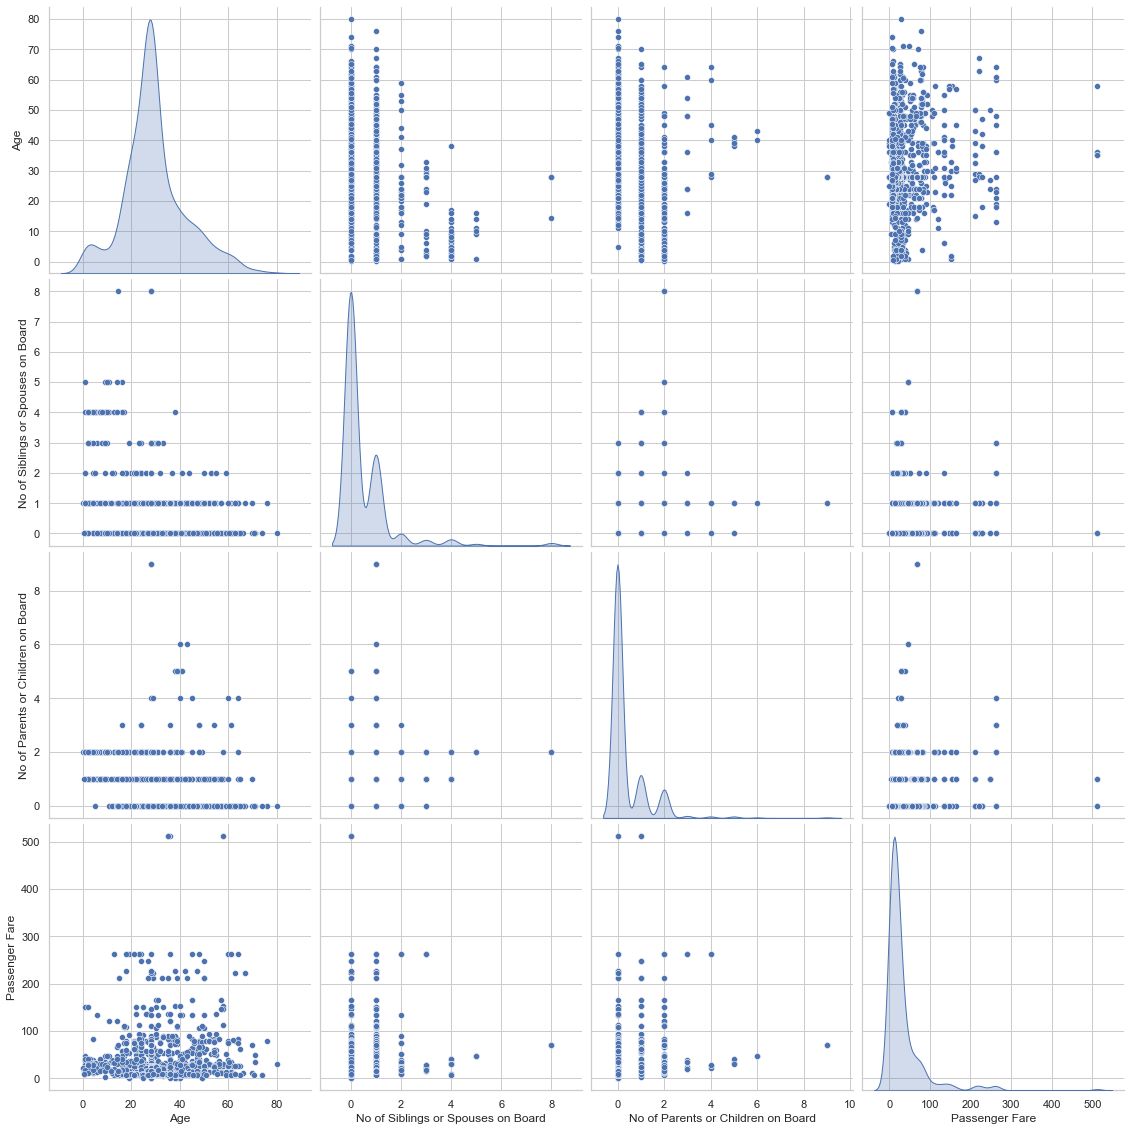

In [26]:
sns.set(style='whitegrid', color_codes=True)
quantitative_plots = sns.pairplot(df[quantitative_cols], height=4, kind='scatter', diag_kind='kde')

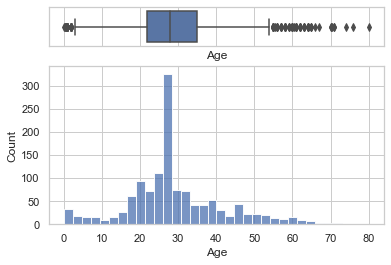

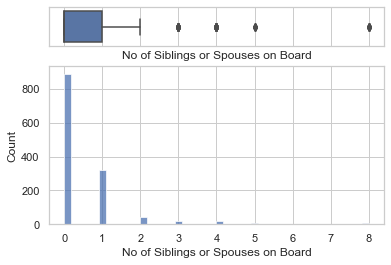

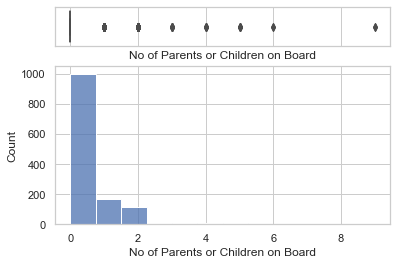

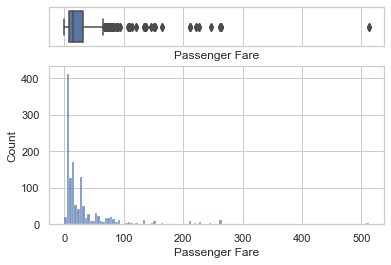

In [27]:
# En relación a la distribución probabilística de las variables por separado, 
# definimos una función para ver en más detalle las mismas y, al mismo tiempo, 
# acompañar la curva de densidad con un histograma junto a un diagrama de caja y bigotes
# con fin de obtener un soporte a la hora de dar cuenta de la presencia de valores atípicos. 

import matplotlib.pyplot as plt

def quantitative_probability_distribution(df, column):
    # Dividimos el marco en dos partes.
    fig, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.20, .80)})
    # Añadimos un gráfico a cada una de las partes.
    sns.boxplot(x = df[column], ax=ax_box)
    sns.histplot(x = df[column], ax=ax_hist)

for col in quantitative_cols:
    quantitative_probability_distribution(df, col)

[**EX13**] Graficar una distribución de las columnas categóricas  
Tip: https://seaborn.pydata.org/tutorial/categorical.html y https://seaborn.pydata.org/generated/seaborn.barplot.html#seaborn.barplot

In [33]:
# Una vez hemos realizado el análisis de las variables numéricas, pasamos a explorar 
# las variables categóricas. Para ello, definimos la función qualitative_probability_distribution 
# que espera recibir como argumentos el dataframe y el nombre de la columna que queremos representar. 
# El cuerpo de la función consiste sencillamente en el despliegue de un gráfico de barras que muestre 
# el conteo del número de ocurrencias para cada uno de los valores de la variable y un diagrama de caja
# y bigotes para la distribución de los valores de la variable dependiente “Survived” con respecto
# a los diferentes valores de la columna en cuestión.

def qualitative_probability_distribution(df, column):
    # Dividimos el marco en dos partes.
    fig, axs = plt.subplots(1, 2, figsize=(12, 4))
    # Añadimos un gráfico a cada una de las partes.
    sns.countplot(x=column, data=df, ax=axs[0])
    sns.barplot(x = col, y = 'target', data = df, ax=axs[1])

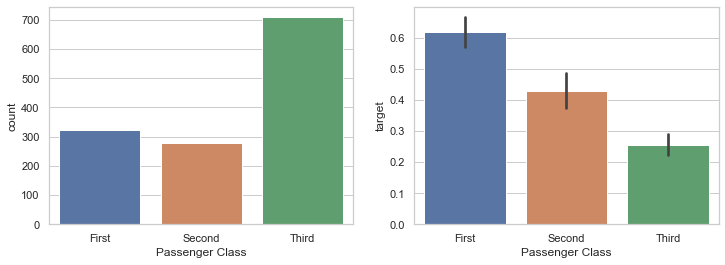

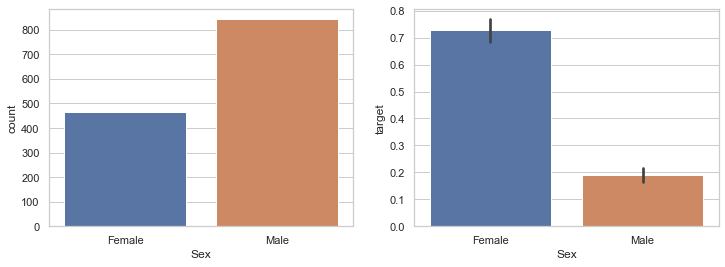

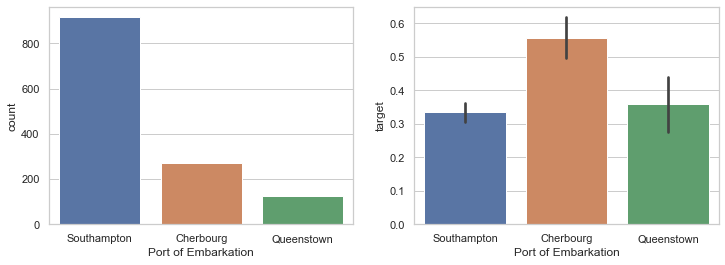

In [34]:
qualitative_cols = ["Passenger Class", "Sex", "Port of Embarkation"]
for col in qualitative_cols:
    qualitative_probability_distribution(df, col)

[**EX14**] Convertir las variables categóricas a dummies y eliminar las innecesarias 
Tip: https://www.geeksforgeeks.org/how-to-create-dummy-variables-in-python-with-pandas/#:~:text=A%20dummy%20variable%20is%20a,python%20using%20get_dummies()%20method.

In [28]:
#get_dummies da un valor numérico a cada VV categórica, pero sin sesgar los datos
#si no especificas una columna, sólo df, lo hace sobre todas las VV categóricas del df

df_clean = pd.get_dummies(df)
df_clean

,Age,No of Siblings or Spouses on Board,No of Parents or Children on Board,Passenger Fare,target,Passenger Class_First,Passenger Class_Second,Passenger Class_Third,Sex_Female,Sex_Male,Port of Embarkation_Cherbourg,Port of Embarkation_Queenstown,Port of Embarkation_Southampton,Survived_No,Survived_Yes
0,29.0,0,0,211.3,1.0,1,0,0,1,0,0,0,1,0,1
1,0.9,1,2,151.6,1.0,1,0,0,0,1,0,0,1,0,1
2,2.0,1,2,151.6,0.0,1,0,0,1,0,0,0,1,1,0
3,30.0,1,2,151.6,0.0,1,0,0,0,1,0,0,1,1,0
4,25.0,1,2,151.6,0.0,1,0,0,1,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,14.5,1,0,14.5,0.0,0,0,1,1,0,1,0,0,1,0
1305,28.0,1,0,14.5,0.0,0,0,1,1,0,1,0,0,1,0
1306,26.5,0,0,7.2,0.0,0,0,1,0,1,1,0,0,1,0
1307,27.0,0,0,7.2,0.0,0,0,1,0,1,1,0,0,1,0


In [29]:
#onehotenconder es mejor, porque guarda un registro del proceso seguido, 

In [30]:
df_clean.drop(columns=['Survived_No', 'Survived_Yes'], inplace=True)

In [35]:
df_cleaned = df_clean.copy()
df_cleaned

,Age,No of Siblings or Spouses on Board,No of Parents or Children on Board,Passenger Fare,target,Passenger Class_First,Passenger Class_Second,Passenger Class_Third,Sex_Female,Sex_Male,Port of Embarkation_Cherbourg,Port of Embarkation_Queenstown,Port of Embarkation_Southampton
0,29.0,0,0,211.3,1.0,1,0,0,1,0,0,0,1
1,0.9,1,2,151.6,1.0,1,0,0,0,1,0,0,1
2,2.0,1,2,151.6,0.0,1,0,0,1,0,0,0,1
3,30.0,1,2,151.6,0.0,1,0,0,0,1,0,0,1
4,25.0,1,2,151.6,0.0,1,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,14.5,1,0,14.5,0.0,0,0,1,1,0,1,0,0
1305,28.0,1,0,14.5,0.0,0,0,1,1,0,1,0,0
1306,26.5,0,0,7.2,0.0,0,0,1,0,1,1,0,0
1307,27.0,0,0,7.2,0.0,0,0,1,0,1,1,0,0


[**Recomendable**] Guardar los datos ya limpios

In [39]:
#usamos la librería pickel: guarda en formato "objeto de python": tanto objetos como modelos
#ocupa mucho menos espacio, y es más fácil luego aplicar modelos, porque sólo lo subes y ya
#wb = writing // dump = función de guardar

with open('data/titanic_cleaned_def.pkl', 'wb') as f:
        pickle.dump(df_cleaned, f)

In [40]:
#verificamos que se ha guardado bien, subiéndolo
# "rb" = reading

with open('data/titanic_cleaned_def.pkl', 'rb') as f:
    df_cleaned = pickle.load(f)

df_cleaned

,Age,No of Siblings or Spouses on Board,No of Parents or Children on Board,Passenger Fare,target,Passenger Class_First,Passenger Class_Second,Passenger Class_Third,Sex_Female,Sex_Male,Port of Embarkation_Cherbourg,Port of Embarkation_Queenstown,Port of Embarkation_Southampton
0,29.0,0,0,211.3,1.0,1,0,0,1,0,0,0,1
1,0.9,1,2,151.6,1.0,1,0,0,0,1,0,0,1
2,2.0,1,2,151.6,0.0,1,0,0,1,0,0,0,1
3,30.0,1,2,151.6,0.0,1,0,0,0,1,0,0,1
4,25.0,1,2,151.6,0.0,1,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,14.5,1,0,14.5,0.0,0,0,1,1,0,1,0,0
1305,28.0,1,0,14.5,0.0,0,0,1,1,0,1,0,0
1306,26.5,0,0,7.2,0.0,0,0,1,0,1,1,0,0
1307,27.0,0,0,7.2,0.0,0,0,1,0,1,1,0,0


## 6.- Datos entrenamiento y testeo
Dividir los datos

[**EX15**] Extraer la variable objetivo  


In [41]:
y = df_cleaned.pop('target')

In [42]:
df_cleaned.head()

,Age,No of Siblings or Spouses on Board,No of Parents or Children on Board,Passenger Fare,Passenger Class_First,Passenger Class_Second,Passenger Class_Third,Sex_Female,Sex_Male,Port of Embarkation_Cherbourg,Port of Embarkation_Queenstown,Port of Embarkation_Southampton
0,29.0,0,0,211.3,1,0,0,1,0,0,0,1
1,0.9,1,2,151.6,1,0,0,0,1,0,0,1
2,2.0,1,2,151.6,1,0,0,1,0,0,0,1
3,30.0,1,2,151.6,1,0,0,0,1,0,0,1
4,25.0,1,2,151.6,1,0,0,1,0,0,0,1


[**EX16**] Splitar los datos en entrenamiento y testeo

In [43]:
#parámetro shuffer: para que no coja los 100 primeros para train y los 100 últimos para test -> que mezcle
#recuerda: antes hemos definido y como nuestra VV objetivo
#test_size: 20% test, 80% train
#random_state: la semilla. Es bueno crearlos en una VV, al inicio del código


X_train, X_test, y_train, y_test = train_test_split (df_cleaned, y, test_size=0.2, random_state=SEED)

In [44]:
# cuantos datos tenemos en X train
len(X_train)

1047

In [45]:
len(X_test)

262

In [46]:
#al poner la semilla, siempre nos tiene que dar los mismos datos y entonces dar siempre el mismo accuracy
#aunque estemos en pcs diferentes
X_train.head()

,Age,No of Siblings or Spouses on Board,No of Parents or Children on Board,Passenger Fare,Passenger Class_First,Passenger Class_Second,Passenger Class_Third,Sex_Female,Sex_Male,Port of Embarkation_Cherbourg,Port of Embarkation_Queenstown,Port of Embarkation_Southampton
1276,31.0,1,0,18.0,0,0,1,1,0,0,0,1
648,21.0,0,0,7.2,0,0,1,0,1,1,0,0
354,25.0,1,0,26.0,0,1,0,0,1,0,0,1
581,28.0,0,0,0.0,0,1,0,0,1,0,0,1
1089,20.0,0,0,9.2,0,0,1,0,1,0,0,1


[**EX17**] Normalizar los datos  
Sklearn - StandardScaler: pt Z Tip: https://scikit-learn.org/stable/modules/preprocessing.html

In [50]:
#Standard Scaler ha estudiado la media y DT del df (paso1), y a partir de ahí ha transformado los datos
# y los ha normalizado (paso2), lo que devuelve un array con todos los datos normalizados

modelo_normalizacion = StandardScaler().fit(X_train)
features = modelo_normalizacion.transform(X_train)
features

array([[ 0.13968997,  0.53887911, -0.4459955 , ..., -0.49940298,
        -0.33209384,  0.65301648],
       [-0.63925867, -0.49826506, -0.4459955 , ...,  2.00239092,
        -0.33209384, -1.53135493],
       [-0.32767921,  0.53887911, -0.4459955 , ..., -0.49940298,
        -0.33209384,  0.65301648],
       ...,
       [-0.09399462, -0.49826506, -0.4459955 , ..., -0.49940298,
        -0.33209384,  0.65301648],
       [ 2.71022046,  0.53887911,  4.12082392, ..., -0.49940298,
        -0.33209384,  0.65301648],
       [-2.19715594, -0.49826506,  1.83741421, ...,  2.00239092,
        -0.33209384, -1.53135493]])

## Multicolinealidad

## 7.- Entrenamiento
Entrenar el modelo

In [53]:
X_train.shape

(1047, 12)

In [54]:
y_train.shape

(1047,)

[**EX18**] Usa una regresión logística

In [55]:
lr = LogisticRegression(max_iter = 1500)
model_lr = lr.fit(X_train, y_train)

In [56]:
lr.score(X_train, y_train)

0.7879656160458453

## 8.- Evaluación
Evaluar el modelo

[**EX19**] Normaliza X_test

In [57]:
X_test_norm = modelo_normalizacion.transform(X_test)

[**EX20**] Aplica el modelo de regr. logística

In [58]:
predictions = lr.predict(X_test_norm)
predictions

C:\Users\Laura\miniconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 0.,
       1., 0., 1., 1., 1., 1., 0., 0., 0., 1., 1., 0., 1., 0., 1., 0., 0.,
       1., 1., 1., 1., 0., 1., 1., 1., 0., 0., 1., 0., 1., 1., 1., 0., 0.,
       1., 1., 0., 1., 0., 0., 1., 1., 1., 1., 1., 1., 1., 0., 0., 1., 0.,
       1., 0., 1., 0., 1., 1., 1., 0., 1., 0., 1., 1., 1., 1., 1., 1., 0.,
       0., 0., 1., 1., 0., 0., 1., 1., 1., 1., 1., 0., 0., 1., 0., 1., 1.,
       1., 0., 1., 1., 0., 1., 1., 0., 0., 0., 0., 0., 1., 0., 1., 1., 0.,
       1., 1., 0., 1., 0., 1., 0., 1., 1., 1., 0., 0., 0., 1., 0., 1., 0.,
       1., 0., 0., 0., 0., 1., 1., 1., 1., 1., 0., 1., 0., 0., 1., 1., 0.,
       1., 1., 1., 0., 1., 0., 1., 1., 1., 1., 0., 1., 1., 1., 0., 1., 0.,
       0., 0., 1., 1., 0., 0., 1., 0., 0., 1., 1., 1., 1., 0., 1., 1., 1.,
       0., 1., 1., 1., 1., 1., 0., 1., 0., 0., 0., 1., 1., 0., 0., 1., 1.,
       1., 0., 1., 1., 0., 0., 1., 1., 0., 1., 1., 1., 1., 0., 0., 1., 1.,
       0., 1., 0., 0., 0.

In [59]:
probability = lr.predict_proba(X_test)
probability

array([[0.34693957, 0.65306043],
       [0.76664779, 0.23335221],
       [0.0848969 , 0.9151031 ],
       [0.87466476, 0.12533524],
       [0.85814296, 0.14185704],
       [0.93255375, 0.06744625],
       [0.84061517, 0.15938483],
       [0.85095985, 0.14904015],
       [0.88191515, 0.11808485],
       [0.81591512, 0.18408488],
       [0.87063679, 0.12936321],
       [0.88513682, 0.11486318],
       [0.75830818, 0.24169182],
       [0.56861381, 0.43138619],
       [0.48898807, 0.51101193],
       [0.72669714, 0.27330286],
       [0.89931217, 0.10068783],
       [0.26584785, 0.73415215],
       [0.72007127, 0.27992873],
       [0.5733995 , 0.4266005 ],
       [0.37082226, 0.62917774],
       [0.06593151, 0.93406849],
       [0.4335385 , 0.5664615 ],
       [0.63065611, 0.36934389],
       [0.91009899, 0.08990101],
       [0.85346937, 0.14653063],
       [0.53276221, 0.46723779],
       [0.88151876, 0.11848124],
       [0.90592735, 0.09407265],
       [0.12810515, 0.87189485],
       [0.

[**EX21**] Medidas de AUC, Accuracy y Matriz de Confusion

In [62]:
# ROC - AUC
from sklearn import metrics
metrics.roc_auc_score(y_test, predictions)

0.7283549783549784

In [63]:
# Accuracy
metrics.accuracy_score(y_test, predictions)

0.7099236641221374

In [64]:
metrics.precision_score(y_test, predictions)

0.6081081081081081

In [65]:
metrics.recall_score(y_test, predictions)

0.8333333333333334

In [66]:
metrics.f1_score(y_test, predictions)

0.7031250000000001

Confusion Matrix for Logistic Regression  



C:\Users\Laura\miniconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


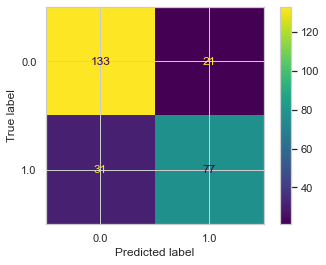

In [76]:
print('\033[1m' + 'Confusion Matrix for Logistic Regression','\033[0m', '\n')

# The next plot is more beatiful than the commented one
#cm_lr = metrics.confusion_matrix(y_test, predictions)
#print(cm_lr)

metrics.plot_confusion_matrix(lr, X_test, y_test)

los falsos positivos son la esquina superior derecha

los falsos negativos son la esquina inferior izquierda

recall = bajar los falsos negative

precision = mínimos false positive

clase positiva = columna izquierda

clase negativa = columna derecha

recall se lee en filas

precision se lee en columnas

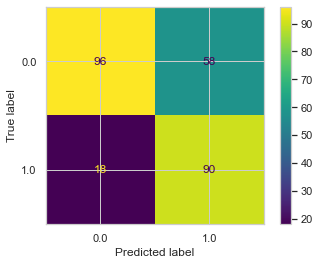

In [78]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, predictions, labels=lr.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=lr.classes_)
disp.plot()

plt.show()

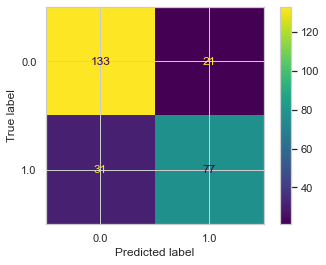

In [79]:
ConfusionMatrixDisplay.from_estimator(lr, X_test, y_test)

from sklearn.metrics import classification_report
>>> y_true = [0, 1, 2, 2, 0]
>>> y_pred = [0, 0, 2, 1, 0]
>>> target_names = ['class 0', 'class 1', 'class 2']
>>> print(classification_report(y_true, y_pred, target_names=target_names))
              precision    recall  f1-score   support

     class 0       0.67      1.00      0.80         2
     class 1       0.00      0.00      0.00         1
     class 2       1.00      0.50      0.67         2

    accuracy                           0.60         5
   macro avg       0.56      0.50      0.49         5
weighted avg       0.67      0.60      0.59         5

In [82]:
from sklearn.feature_selection import RFE
# Fijamos el número final de variables que vamos a emplear para el modelo logístico.
n_features = 5
lr = LogisticRegression(max_iter=1500)
# Utilizamos el método RFE para elegir el número de variables que hemos seleccionado.
rfe = RFE(lr, n_features_to_select=n_features)
rfe = rfe.fit(X_train, y_train)

In [84]:
# Ranking de las variables que podríamos seleccionar como definitivas:
ranking = zip(df_cleaned.columns, rfe.support_, rfe.ranking_)
list(ranking)
# Vemos con True las variables que han salido seleccionadas para nuestro modelo:
# "Age", "Passenger Class_First", "Passenger Class_Third", "Sex_Female", "Sex_Male"

[('Age', False, 6),
 ('No of Siblings or Spouses on Board', False, 4),
 ('No of Parents or Children on Board', False, 7),
 ('Passenger Fare', False, 8),
 ('Passenger Class_First', True, 1),
 ('Passenger Class_Second', False, 5),
 ('Passenger Class_Third', True, 1),
 ('Sex_Female', True, 1),
 ('Sex_Male', True, 1),
 ('Port of Embarkation_Cherbourg', True, 1),
 ('Port of Embarkation_Queenstown', False, 3),
 ('Port of Embarkation_Southampton', False, 2)]

## 9.- Conclusiones

* Hay sobreajuste?
* Es bueno el resultado obtenido?